In [198]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [199]:
!unzip /content/stroke.zip

Archive:  /content/stroke.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [200]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [201]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [202]:
df['bmi'].isna()

0       False
1        True
2       False
3       False
4       False
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

In [203]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [204]:
#df['bmi'].fillna(np.random)

In [205]:
df=df[df['bmi'].isna()==False]

In [206]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [207]:
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


In [208]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])#Male=1 Female=0
df['Residence_type']=le.fit_transform(df['Residence_type'])#Urban=1 Rural=0
df['ever_married']=le.fit_transform(df['ever_married'])#Urban=1 Rural=0


<ipython-input-208-1f57809f45d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=le.fit_transform(df['gender'])#Male=1 Female=0
<ipython-input-208-1f57809f45d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residence_type']=le.fit_transform(df['Residence_type'])#Urban=1 Rural=0
<ipython-input-208-1f57809f45d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [209]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,56669,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,children,0,103.08,18.6,Unknown,0
5106,44873,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,19723,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,37544,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [210]:
df=pd.get_dummies(df,columns=['work_type','smoking_status'])

In [211]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [212]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,56669,1,81.0,0,0,1,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0


In [213]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [214]:
df[['avg_glucose_level','bmi','age']]=scaler.fit_transform(df[['avg_glucose_level','bmi','age']])

In [215]:
df.drop('id',axis=1,inplace=True)

###Train Test Splits for Autoencoder

In [216]:
from sklearn.model_selection import train_test_split
LABEL='stroke'
features=df.drop(LABEL,axis=1)
label=df[LABEL]

x_train, x_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2,shuffle=True,stratify=label
)


In [217]:
x_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2762,0,0.206543,0,0,0,0,0.203905,0.124857,0,0,1,0,0,1,0,0,0
950,1,0.182129,0,0,0,1,0.013018,0.359679,0,0,1,0,0,1,0,0,0
2658,0,0.743652,0,0,1,1,0.234928,0.271478,1,0,0,0,0,0,0,0,1
537,1,0.792480,0,0,1,1,0.233081,0.201604,0,0,0,1,0,1,0,0,0
4303,1,0.017090,0,0,0,0,0.262672,0.121420,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,0,0.414062,0,0,1,0,0.146801,0.134021,0,0,1,0,0,1,0,0,0
2790,1,0.121094,0,0,0,0,0.063798,0.088202,0,0,0,0,1,1,0,0,0
3416,0,0.572754,0,0,1,1,0.105207,0.229095,0,0,1,0,0,0,1,0,0
669,1,0.487305,0,0,1,0,0.208383,0.179840,1,0,0,0,0,1,0,0,0


In [218]:
#0 for no stroke(normal) 1 for stroke(anomaly)
train_index=y_train[y_train==0].index
train_data=x_train.loc[train_index]

In [219]:
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [220]:
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [221]:
model = AutoEncoder(output_units=train_data.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    train_data,
    train_data,
    epochs=500,
    batch_size=512,
    validation_data=(x_test, x_test)
)

Epoch 1/500
8/8 [==============================] - 1s 42ms/step - loss: 0.1254 - mse: 0.2200 - val_loss: 0.1220 - val_mse: 0.2147
Epoch 2/500
8/8 [==============================] - 0s 10ms/step - loss: 0.1186 - mse: 0.2085 - val_loss: 0.1114 - val_mse: 0.1972
Epoch 3/500
8/8 [==============================] - 0s 12ms/step - loss: 0.1044 - mse: 0.1860 - val_loss: 0.0916 - val_mse: 0.1681
Epoch 4/500
8/8 [==============================] - 0s 9ms/step - loss: 0.0845 - mse: 0.1594 - val_loss: 0.0731 - val_mse: 0.1469
Epoch 5/500
8/8 [==============================] - 0s 11ms/step - loss: 0.0734 - mse: 0.1493 - val_loss: 0.0703 - val_mse: 0.1478
Epoch 6/500
8/8 [==============================] - 0s 13ms/step - loss: 0.0716 - mse: 0.1486 - val_loss: 0.0684 - val_mse: 0.1439
Epoch 7/500
8/8 [==============================] - 0s 10ms/step - loss: 0.0694 - mse: 0.1437 - val_loss: 0.0665 - val_mse: 0.1387
Epoch 8/500
8/8 [==============================] - 0s 15ms/step - loss: 0.0679 - mse: 0.139

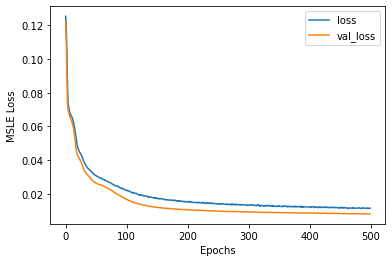

In [222]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [223]:
def find_threshold(model,train_data):
  reconstructions = model.predict(train_data)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, train_data)

  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def find_threshold_method_two(model, train_data):
  # another method to find threshold
  reconstructions = model.predict(train_data)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, train_data)

  threshold_2 = np.percentile(reconstruction_errors, 95)
  return threshold_2

def get_predictions(model, x_test, threshold):
  predictions = model.predict(x_test)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test)
  # 0 = no stroke(normal), 1 = stroke(anomaly)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

In [224]:
threshold=find_threshold(model,train_data)

118/118 [==============================] - 0s 2ms/step


In [225]:
from sklearn.metrics import accuracy_score
preds = get_predictions(model, x_test, threshold)
accuracy_score(preds, y_test)

31/31 [==============================] - 0s 1ms/step


0.8411405295315683